## Setups & Imports

In [1]:
# Importation of libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

---
## Importation of Datasets

In [2]:
# Importation of Fashion-MNIST
(fashion_X_train, fashion_y_train), (fashion_X_test, fashion_y_test) = fashion_mnist.load_data()

# Combine train and test sets to get all 70,000 images
fashion_X = np.concatenate([fashion_X_train, fashion_X_test])
fashion_y = np.concatenate([fashion_y_train, fashion_y_test])

# Initial inspection
print("Total images:", fashion_X.shape[0])          
print("Image dimensions:", fashion_X.shape[1:])     
print("Total labels:", fashion_y.shape[0])        
print("Unique categories:", np.unique(fashion_y))   

Total images: 70000
Image dimensions: (28, 28)
Total labels: 70000
Unique categories: [0 1 2 3 4 5 6 7 8 9]


In [3]:
# Importation of Beer Reviews
file_path = "C:/Users/Admin/Desktop/SC4020/beer_reviews.csv"  # Replace with your CSV file path
beer_reviews_df = pd.read_csv(file_path)

# Initial inspection
print("First 5 records:\n", beer_reviews_df.head())
print("\nDataset info:")
print(beer_reviews_df.info())
print("\nMissing values per column:")
print(beer_reviews_df.isnull().sum())

First 5 records:
    brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          For

---
## Data Cleaning & Preprocessing

In [4]:
### Fashion MNIST
# Flatten images (28x28 → 784)
fashion_X_flat = fashion_X.reshape(fashion_X.shape[0], -1)

# Normalize pixel values to range [0, 1]
fashion_X_normalized = fashion_X_flat / 255.0

# Inspect results
print("Shape after flattening:", fashion_X_normalized.shape)

Shape after flattening: (70000, 784)


Explained variance (Fashion-MNIST): 0.8625712697433543


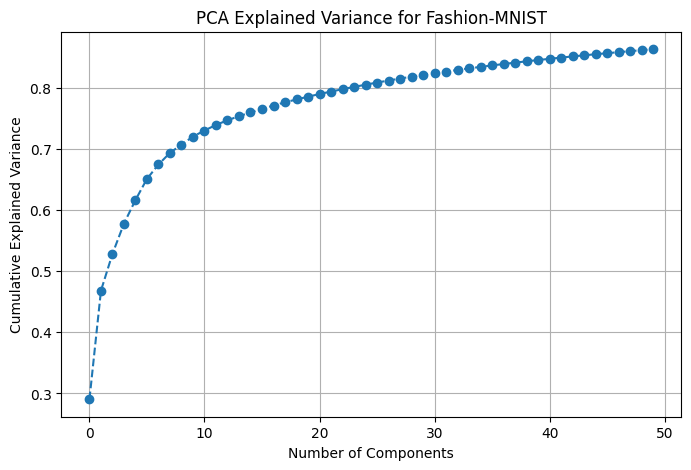

In [5]:
### Fashion-MNIST
## Dimensionality Reduction
# PCA Reduction (50 Components)
pca = PCA(n_components=50)
fashion_X_pca = pca.fit_transform(fashion_X_normalized)
print("Explained variance (Fashion-MNIST):", np.sum(pca.explained_variance_ratio_))

# Plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance for Fashion-MNIST")
plt.grid(True)
plt.show()

In [6]:
### Beer Reviews
# Remove rows with missing values
beer_reviews_cleaned = beer_reviews_df.dropna().copy()
print(f"\nRows before removing missing values: {beer_reviews_df.shape[0]}")
print(f"Rows after removing missing values: {beer_reviews_cleaned.shape[0]}")
print(f"Number of Rows removed: {beer_reviews_df.shape[0] - beer_reviews_cleaned.shape[0]} "
      f"({(beer_reviews_df.shape[0] - beer_reviews_cleaned.shape[0]) / beer_reviews_df.shape[0] * 100:.2f}%)")

# Standardize numerical values
num_features = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', "beer_abv"]  
scaler = StandardScaler()
beer_reviews_cleaned[num_features] = scaler.fit_transform(beer_reviews_cleaned[num_features])

# Normalize numerical values to range [0, 1]
minmax_scaler = MinMaxScaler()
beer_reviews_cleaned[num_features] = minmax_scaler.fit_transform(beer_reviews_cleaned[num_features])

# Inspect results
print("\nFirst 5 rows after Standardization and Normalization:")
print(beer_reviews_cleaned[num_features].head())


Rows before removing missing values: 1586614
Rows after removing missing values: 1518478
Number of Rows removed: 68136 (4.29%)

First 5 rows after Standardization and Normalization:
   review_overall  review_aroma  review_appearance  review_palate  \
0             0.3         0.250                0.5          0.125   
1             0.6         0.375                0.6          0.500   
2             0.6         0.375                0.6          0.500   
3             0.6         0.500                0.7          0.375   
4             0.8         0.875                0.8          0.750   

   review_taste  beer_abv  
0         0.125  0.086497  
1         0.500  0.107298  
2         0.500  0.112498  
3         0.500  0.086497  
4         0.875  0.133299  
